In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import learning_curve,train_test_split

%matplotlib inline
sns.set_style("whitegrid")

In [195]:
hpp = pd.read_csv("data_adv_pred.csv")

In [196]:
hpp.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [197]:
hpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [198]:
#Adding Features

hpp['date'] = pd.to_datetime(hpp['date'])
hpp['month'] = hpp['date'].dt.month
hpp['year'] = hpp['date'].dt.year

hpp['Building age'] = hpp['year'] - hpp['yr_built']

In [199]:
hpp.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
month               3
year                1
Building age      115
dtype: int64

In [200]:
#Dropping unwanted columns

hpp.drop(['year','country','date','statezip','street','yr_built'],axis=1,inplace=True)


In [201]:
hpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_renovated   4600 non-null   int64  
 12  city           4600 non-null   object 
 13  month          4600 non-null   int64  
 14  Building age   4600 non-null   int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 539.2+ KB


In [202]:
#converting Datatypes

hpp['bedrooms'] = hpp['bedrooms'].astype('category')
hpp['bathrooms'] = hpp['bathrooms'].astype('category')
hpp['floors'] = hpp['floors'].astype('category')
hpp['waterfront'] = hpp['waterfront'].astype('category')
hpp['view'] = hpp['view'].astype('category')
hpp['condition'] = hpp['condition'].astype('category')
hpp['city'] = hpp['city'].astype('category')
hpp['month'] = hpp['month'].astype('category')

In [203]:
hpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          4600 non-null   float64 
 1   bedrooms       4600 non-null   category
 2   bathrooms      4600 non-null   category
 3   sqft_living    4600 non-null   int64   
 4   sqft_lot       4600 non-null   int64   
 5   floors         4600 non-null   category
 6   waterfront     4600 non-null   category
 7   view           4600 non-null   category
 8   condition      4600 non-null   category
 9   sqft_above     4600 non-null   int64   
 10  sqft_basement  4600 non-null   int64   
 11  yr_renovated   4600 non-null   int64   
 12  city           4600 non-null   category
 13  month          4600 non-null   category
 14  Building age   4600 non-null   int64   
dtypes: category(8), float64(1), int64(6)
memory usage: 291.5 KB


In [204]:
hpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          4600 non-null   float64 
 1   bedrooms       4600 non-null   category
 2   bathrooms      4600 non-null   category
 3   sqft_living    4600 non-null   int64   
 4   sqft_lot       4600 non-null   int64   
 5   floors         4600 non-null   category
 6   waterfront     4600 non-null   category
 7   view           4600 non-null   category
 8   condition      4600 non-null   category
 9   sqft_above     4600 non-null   int64   
 10  sqft_basement  4600 non-null   int64   
 11  yr_renovated   4600 non-null   int64   
 12  city           4600 non-null   category
 13  month          4600 non-null   category
 14  Building age   4600 non-null   int64   
dtypes: category(8), float64(1), int64(6)
memory usage: 291.5 KB


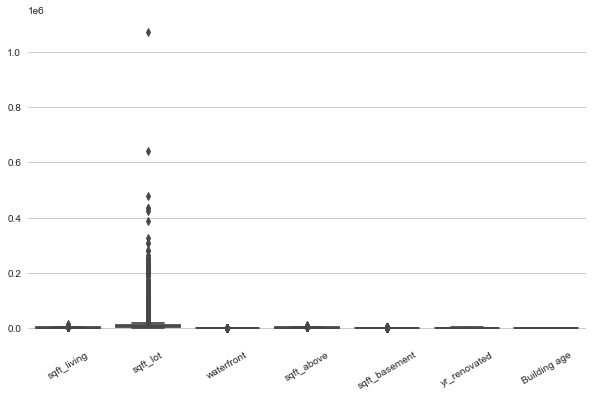

In [205]:
# We can observe the outliears with box plot 
df_check = hpp.drop('price',axis=1)
plt.subplots(figsize=(10, 6))
x = sns.boxplot(data=df_check)
x.set_xticklabels(x.get_xticklabels(), rotation=30);

In [206]:
# Outlier Treatment
outlier_columns = ['sqft_living','sqft_lot','sqft_above','sqft_basement']

for column in outlier_columns:
    iqr = np.percentile(hpp[column],75) - np.percentile(hpp[column],25)
    ll = np.percentile(hpp[column],25) - (1.5 * iqr)
    ul = np.percentile(hpp[column],75) + (1.5 * iqr)
    
    hpp.loc[hpp[column]>ul,column] = np.nan
    hpp.loc[hpp[column]<ll,column] = np.nan
    
    hpp[column] = hpp[column].fillna(hpp[column].mean())

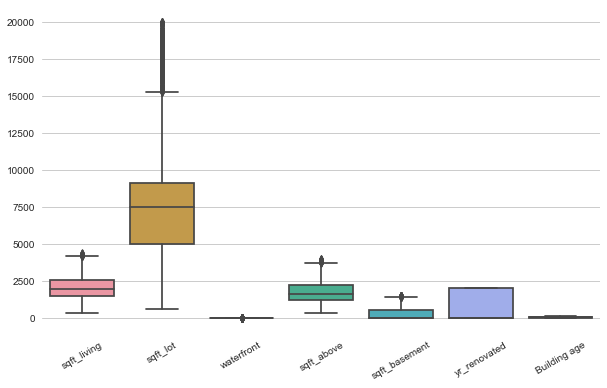

In [207]:
df_check = hpp.drop('price',axis=1)
plt.subplots(figsize=(10, 6))
x = sns.boxplot(data=df_check)
x.set_xticklabels(x.get_xticklabels(), rotation=30);

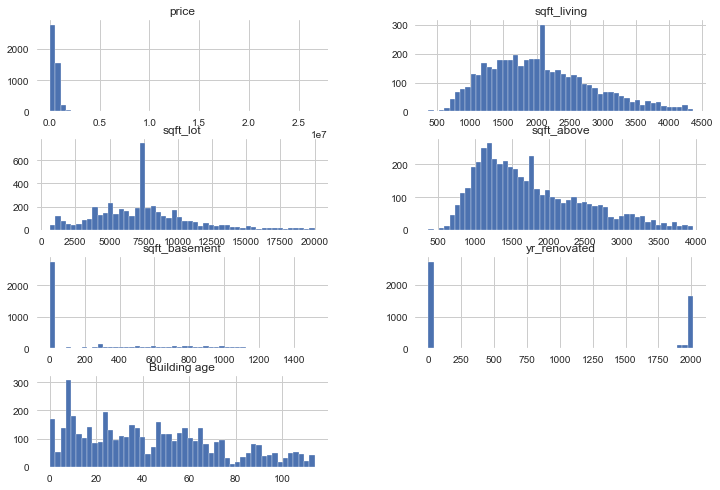

In [208]:
columns = list(hpp)
hpp[columns].hist(stacked=False, bins=50, figsize=(12,30), layout=(14,2)); 

In [209]:
hpp.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_renovated,city,month,Building age
0,313000.0,3.0,1.50,1340.0,7912.0,1.5,0,0,3,1340.0,0.0,2005,Shoreline,5,59
1,2384000.0,5.0,2.50,3650.0,9050.0,2.0,0,4,5,3370.0,280.0,0,Seattle,5,93
2,342000.0,3.0,2.00,1930.0,11947.0,1.0,0,0,4,1930.0,0.0,0,Kent,5,48
3,420000.0,3.0,2.25,2000.0,8030.0,1.0,0,0,4,1000.0,1000.0,0,Bellevue,5,51
4,550000.0,4.0,2.50,1940.0,10500.0,1.0,0,0,4,1140.0,800.0,1992,Redmond,5,38


<AxesSubplot:>

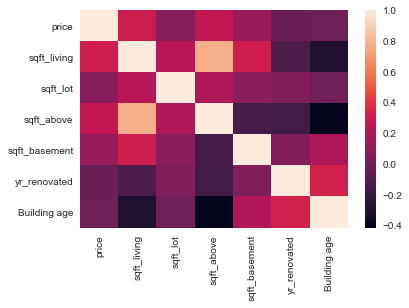

In [210]:
sns.heatmap(hpp.corr())

In [211]:
hpp.drop('sqft_above',axis=1,inplace=True)

In [212]:
df = pd.get_dummies(hpp)

In [213]:
df.shape

(4600, 107)

In [214]:
features = [col for col in df.columns if col != 'price']

X_train, X_test, y_train, y_test = train_test_split(df[features], df['price'], test_size=.2, random_state=22)
X_train.shape, X_test.shape

((3680, 106), (920, 106))

In [215]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [216]:
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

#print("Intercept of the linear equation:", linearregression.intercept_) 
#print("\nCoefficients of the equation are:", linearregression.coef_)

pred = linearregression.predict(X_test)   
m0 = 'LinearRegression'
# Mean Absolute Error
m1 = "{:.2f}".format(mean_absolute_error(y_test, pred))
print("\nMean Absolute Error:", mean_absolute_error(y_test, pred))
# RMSE
m2 = mean_squared_error(y_test, pred)**0.5
print("\nRMSE:", mean_squared_error(y_test, pred)**0.5)
# R2 Squared:
m3 = r2_score(y_test, pred)
print("\nR2 Squared - Score:", r2_score(y_test, pred))
# Training Score
m4 = "{:.2f}".format(linearregression.score(X_train, y_train))
print("\nTraining Score:", linearregression.score(X_train, y_train))
# Testing score
m5 = "{:.2f}".format(linearregression.score(X_test, y_test))
print("\nTesting score:",linearregression.score(X_test, y_test))


Mean Absolute Error: 143352.45990404824

RMSE: 263529.6943690484

R2 Squared - Score: 0.4760868569021466

Training Score: 0.2223166438174442

Testing score: 0.4760868569021466


In [228]:
linearregression.

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [217]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

poly_y_pred = poly_clf.predict(X_test2)

In [218]:
m0 = 'Linear Poly degree 2'
# Mean Absolute Error
m1 = "{:.2f}".format(mean_absolute_error(y_test, poly_y_pred))
print("\nMean Absolute Error:", mean_absolute_error(y_test, poly_y_pred))
# RMSE
m2 = mean_squared_error(y_test, poly_y_pred)**0.5
print("\nRMSE:", mean_squared_error(y_test, poly_y_pred)**0.5)
# R2 Squared:
m3 = r2_score(y_test, poly_y_pred)
print("\nR2 Squared - Score:", r2_score(y_test, poly_y_pred))
# Training Score
m4 = "{:.2f}".format(poly_clf.score(X_train2, y_train))
print("\nTraining Score:  %.2f" % (poly_clf.score(X_train2, y_train)))
# Testing score
m5 = "{:.2f}".format(poly_clf.score(X_test2, y_test))
print("\nTesting score: %.2f" % (poly_clf.score(X_test2, y_test)))
#print(y_pred)


Mean Absolute Error: 4.176606917089182e+16

RMSE: 2.330928568391752e+17

R2 Squared - Score: -4.098813011648914e+23

Training Score:  0.44

Testing score: -409881301164891408695296.00


In [219]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
DTregressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
DTregressor.fit(X_train, y_train) 

DT_y_pred = DTregressor.predict(X_test) 

In [220]:
m0 = 'Decision Tree'
# Mean Absolute Error
m1 = "{:.2f}".format(mean_absolute_error(y_test, DT_y_pred))
print("\nMean Absolute Error:", mean_absolute_error(y_test, DT_y_pred))
# RMSE
m2 = mean_squared_error(y_test, DT_y_pred)**0.5
print("\nRMSE:", mean_squared_error(y_test, DT_y_pred)**0.5)
# R2 Squared:
m3 = r2_score(y_test, DT_y_pred)
print("\nR2 Squared - Score:", r2_score(y_test, DT_y_pred))
# Training Score
m4 = "{:.2f}".format(DTregressor.score(X_train, y_train))
print("\nTraining Score: %.2f" % (DTregressor.score(X_train, y_train)))
# Testing score
m5 = "{:.2f}".format(DTregressor.score(X_test, y_test))
print("\nTesting score: %.2f" % (DTregressor.score(X_test, y_test)))
#print(y_pred)


Mean Absolute Error: 156071.62866958042

RMSE: 285293.73683708644

R2 Squared - Score: 0.3859769821383485

Training Score: 1.00

Testing score: 0.39


In [221]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

RFregressor = RandomForestRegressor(max_depth=2, random_state=0)
RFregressor.fit(X_train, y_train )

RF_y_pred = RFregressor.predict(X_test)

In [222]:
m0 = 'Random Forest'
# Mean Absolute Error
m1 = "{:.2f}".format(mean_absolute_error(y_test, RF_y_pred))
print("\nMean Absolute Error:", mean_absolute_error(y_test, RF_y_pred))
# RMSE
m2 = mean_squared_error(y_test, RF_y_pred)**0.5
print("\nRMSE:", mean_squared_error(y_test, RF_y_pred)**0.5)
# R2 Squared:
m3 = r2_score(y_test, RF_y_pred)
print("\nR2 Squared - Score:", r2_score(y_test, RF_y_pred))
# Training Score
m4 = "{:.2f}".format(RFregressor.score(X_train, y_train))
print("\nTraining Score: %.2f" % (RFregressor.score(X_train, y_train)))
# Testing score
m5 = "{:.2f}".format(RFregressor.score(X_test, y_test))
print("\nTesting score: %.2f" % (RFregressor.score(X_test, y_test)))
#print(y_pred)


Mean Absolute Error: 184434.99270072812

RMSE: 294129.79576534533

R2 Squared - Score: 0.34735319011354027

Training Score: 0.13

Testing score: 0.35


In [223]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

GBregressor = GradientBoostingRegressor(random_state=0)
GBregressor.fit(X_train, y_train)

GB_y_pred = GBregressor.predict(X_test)

In [224]:
m0 = 'Gradient Boosting'
# Mean Absolute Error
m1 = "{:.2f}".format(mean_absolute_error(y_test, GB_y_pred))
print("\nMean Absolute Error:", mean_absolute_error(y_test, GB_y_pred))
# RMSE
m2 = mean_squared_error(y_test, GB_y_pred)**0.5
print("\nRMSE:", mean_squared_error(y_test, GB_y_pred)**0.5)
# R2 Squared:
m3 = r2_score(y_test, GB_y_pred)
print("\nR2 Squared - Score:", r2_score(y_test, GB_y_pred))
# Training Score
m4 = "{:.2f}".format(GBregressor.score(X_train, y_train))
print("\nTraining Score: %.2f" % (GBregressor.score(X_train, y_train)))
# Testing score
m5 = "{:.2f}".format(GBregressor.score(X_test, y_test))
print("\nTesting score: %.2f" % (GBregressor.score(X_test, y_test)))
#print(y_pred)


Mean Absolute Error: 134233.4330924904

RMSE: 252382.99728927412

R2 Squared - Score: 0.5194701572571695

Training Score: 0.51

Testing score: 0.52


In [225]:
result = pd.DataFrame([GB_y_pred,y_test])

In [226]:
result

,0,1,2,3,4,5,6,7,8,9,...,910,911,912,913,914,915,916,917,918,919
0,479829.341164,233972.702034,257769.405663,484704.234851,523504.519206,600267.967985,621950.162203,659224.011284,552076.290286,614945.476017,...,371748.493561,575581.395771,700840.802078,609381.083196,637195.035368,404167.00914,536575.012297,315515.140551,779973.673621,318556.783718
1,460000.000000,157500.000000,339000.000000,449500.000000,210000.000000,448000.000000,715000.000000,578000.000000,455000.000000,681716.000000,...,353250.000000,509900.000000,695000.000000,585000.000000,515500.000000,267000.00000,465000.000000,225000.000000,390000.000000,339900.000000


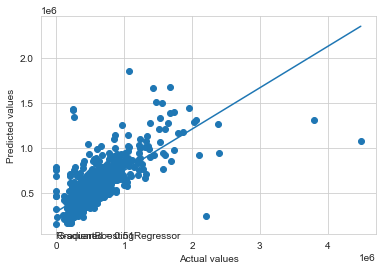

In [184]:
import numpy as np
import matplotlib.pyplot as plt7

Y_test = np.random.rand(100) # Random Data
Y_pred = Y_test + np.random.rand(100)*0.1 # Random Data

r_squared = 0.514898528849494
plt7.scatter(y_test,GB_y_pred)
plt7.xlabel('Actual values')
plt7.ylabel('Predicted values')

plt7.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, GB_y_pred, 1))(np.unique(y_test)))

plt7.text(40, 20, 'R-squared = %0.2f' % r_squared)
plt7.text(40, 10, 'GradientBoostingRegressor')
plt7.show()

In [ ]:
#Data Frame to compare the metrics for all the models 
metrics = pd.DataFrame(columns=['model', 'training_score', 'test_score', 'k_fold_mean', 'k_fold_std','MAE'])


In [185]:
from sklearn.model_selection import learning_curve

In [186]:
train_sizes = [1, 100, 500, 1000, 2500 , 3000]

In [187]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(),
X = df[features],
y = df['price'], train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [191]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [192]:
pd.DataFrame(df[features])

,sqft_living,sqft_lot,sqft_basement,yr_renovated,Building age,bedrooms_0.0,bedrooms_1.0,bedrooms_2.0,bedrooms_3.0,bedrooms_4.0,...,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,month_5,month_6,month_7
0,1340.0,7912.0,0.0,2005,59,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,3650.0,9050.0,280.0,0,93,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1930.0,11947.0,0.0,0,48,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,2000.0,8030.0,1000.0,0,51,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1940.0,10500.0,800.0,1992,38,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,1510.0,6360.0,0.0,1979,60,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4596,1460.0,7573.0,0.0,2009,31,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4597,3010.0,7014.0,0.0,0,5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4598,2090.0,6630.0,1020.0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
